In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/HackerEarth/dataset/train.csv')

In [3]:
df.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [4]:
train_dir = '/content/drive/MyDrive/HackerEarth/dataset/train'
test_dir = '/content/drive/MyDrive/HackerEarth/dataset/test'

In [5]:
import cv2

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Dropout, Conv2D, Dense, MaxPooling2D, AveragePooling2D, Flatten, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import random

In [7]:
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)

In [8]:
train_gen = datagen.flow_from_dataframe(df,
                                       directory=train_dir,
                                       x_col='Image',
                                       y_col='Class',
                                       color_mode='rgb',
                                       target_size=(331,331),
                                       class_mode='categorical',
                                       shuffle=True,
                                       subset='training',
                                       batch_size=128)

Found 5176 validated image filenames belonging to 6 classes.


In [9]:

val_gen = datagen.flow_from_dataframe(df,
                                    directory=train_dir,
                                    x_col='Image',
                                    y_col='Class',
                                    color_mode='rgb',
                                    target_size=(331,331),
                                    class_mode='categorical',
                                    shuffle=True,
                                    subset='validation',
                                    batch_size=128)

Found 1293 validated image filenames belonging to 6 classes.


In [10]:
from keras.applications.vgg16 import VGG16

In [11]:
model_vg=VGG16(weights='imagenet',include_top=False)
model_vg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [13]:
base_layer = NASNetLarge(pooling='avg', weights='imagenet', include_top=True)

model = Sequential([base_layer,
                   Dense(units = 512, activation='relu'),
                   Dropout(0.4),
                   Dense(units = 256, activation='relu'),
                   Dropout(0.3),
                   Dense(units=6, activation='softmax')])

model.layers[0].trainable=False

opt = Adam(lr=1e-3, decay=1e-5)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

359751680/359748576 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 1000)              88949818  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 1542      
Total params: 89,595,200
Trainable params: 645,382
No

In [14]:
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

Epoch 1/10
41/41 [==============================] - 1881s 45s/step - loss: 1.5719 - accuracy: 0.3933 - val_loss: 1.0403 - val_accuracy: 0.6489
Epoch 2/10
41/41 [==============================] - 174s 4s/step - loss: 0.8400 - accuracy: 0.7249 - val_loss: 0.6605 - val_accuracy: 0.7657
Epoch 3/10
41/41 [==============================] - 181s 4s/step - loss: 0.5666 - accuracy: 0.7975 - val_loss: 0.6363 - val_accuracy: 0.7788
Epoch 4/10
41/41 [==============================] - 182s 4s/step - loss: 0.5003 - accuracy: 0.8200 - val_loss: 0.6197 - val_accuracy: 0.7896
Epoch 5/10
41/41 [==============================] - 182s 4s/step - loss: 0.4356 - accuracy: 0.8439 - val_loss: 0.6127 - val_accuracy: 0.8105
Epoch 6/10
41/41 [==============================] - 182s 4s/step - loss: 0.4059 - accuracy: 0.8524 - val_loss: 0.6212 - val_accuracy: 0.8090
Epoch 7/10
41/41 [==============================] - 182s 4s/step - loss: 0.3576 - accuracy: 0.8708 - val_loss: 0.6426 - val_accuracy: 0.8059
Epoch 8/10


In [15]:
results = model.evaluate(val_gen)
print("val_loss, val_acc: ", results)

11/11 [==============================] - 37s 3s/step - loss: 0.6938 - accuracy: 0.8012
val_loss, val_acc:  [0.693831205368042, 0.8012374043464661]


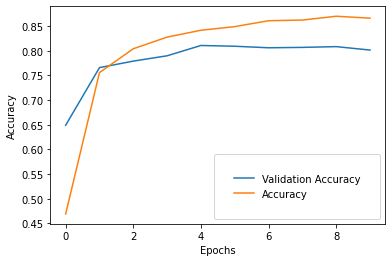

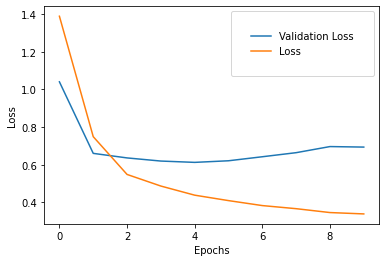

In [16]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(borderpad=2)
plt.show()
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(borderpad=2)
plt.show()

In [17]:

def preprocess(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (331, 331))
    img = img/255.
    return img

In [18]:
old_labels = train_gen.class_indices
NUM_TO_LABEL = dict((v,k) for k,v in old_labels.items())
NUM_TO_LABEL

{0: 'Airplane',
 1: 'Candle',
 2: 'Christmas_Tree',
 3: 'Jacket',
 4: 'Miscellaneous',
 5: 'Snowman'}

In [26]:
model.save('PS1.h5')

In [27]:
from google.colab import files
files.download("PS1.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>